1. Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import copy as copy
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from scipy.stats import zscore, ttest_ind, chi2_contingency
from scipy.stats import spearmanr,pointbiserialr
import sklearn.metrics as metrics
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
# import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

2. Read the data as a dataframe

In [4]:
campaign_df = pd.read_csv('bank-full.csv')

#take a deep copy of the dataset
campaign_copy_df = copy.deepcopy(campaign_df)

#display the first five rows
campaign_copy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


3. Perform basic EDA operations on the dataframe

a) Shape of the data

In [5]:
print(campaign_copy_df.shape)

(45211, 17)


b) Data type of each attribute

In [7]:
print(campaign_copy_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


In [8]:
print(campaign_copy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


c) Checking the presence of missing values

In [9]:
print(campaign_copy_df.isna().sum())
print(campaign_copy_df.isna().any())

print('\n \n INFERENCE : There are no null values present')

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

 
 INFERENCE : There are no null values present


In [10]:
#check whether each columns have the respective information as per the description

#Numerical values check
print('Check whether any of the numeric columns has negative data:')

num_cols = campaign_copy_df.select_dtypes(include = ['int64'])

num_count = (num_cols < 0).sum()
print(num_count)

print("\nDistinct negative values corresponding to 'pdays'")
pdays_negative_values = campaign_copy_df['pdays'][campaign_copy_df['pdays'] < 0].value_counts()
print(pdays_negative_values)

print("\nINFERENCE : (i)  3766 customers have negative balance.\n"
      "            (ii) 36954 customers have -1 pdays implying\n"
      "                the client was not contacted before.\n")

Check whether any of the numeric columns has negative data:
age             0
balance      3766
day             0
duration        0
campaign        0
pdays       36954
previous        0
dtype: int64

Distinct negative values corresponding to 'pdays'
-1    36954
Name: pdays, dtype: int64

INFERENCE : (i)  3766 customers have negative balance.
            (ii) 36954 customers have -1 pdays implying
                the client was not contacted before.



d. 5 Point summary of numerical attributes

In [11]:
#five point summary calculation
inference = {'age': 'There is a slight diff between mean and median.\nThis indicates presence of outliers and skewness.',
             'balance': 'There is a huge diff between mean and median.\nThe standard deviation is very high.\nThis indicates presence of large number of outliers and right skewed as mean > median.',
             'day': 'There is only a slight diff between mean and median.\nThis could be a sign of minimal or no outliers.',
             'duration': 'There is a huge diff between mean and median.\nThe standard deviation is very high.\nThis indicates presence of large number of outliers and right skewed as mean > median.',
             'campaign': 'There is a diff between mean and median.\nThis indicates presence of outliers and right skewness.',
             'pdays': 'There is a huge diff between mean and median.\nThe standard deviation is very high.\nThis indicates presence of large number of outliers and right skewed as mean > median.',
             'previous': 'There is a significant diff between mean and median.\nThe standard deviation is very high.\nThis indicates presence of large number of outliers and right skewed as mean > median.'}
describe = campaign_copy_df.describe()
for i in describe:
    print('\nMean of {}:'.format(i), describe[i]['mean'])
    print('Median of {}:'.format(i), campaign_copy_df[i].median())        
    print('Std of {}:'.format(i),describe[i]['std'])
    print('INFERENCE:', inference[i])

campaign_copy_df.describe()


Mean of age: 40.93621021432837
Median of age: 39.0
Std of age: 10.618762040975431
INFERENCE: There is a slight diff between mean and median.
This indicates presence of outliers and skewness.

Mean of balance: 1362.2720576850766
Median of balance: 448.0
Std of balance: 3044.7658291686002
INFERENCE: There is a huge diff between mean and median.
The standard deviation is very high.
This indicates presence of large number of outliers and right skewed as mean > median.

Mean of day: 15.80641879188693
Median of day: 16.0
Std of day: 8.322476153044185
INFERENCE: There is only a slight diff between mean and median.
This could be a sign of minimal or no outliers.

Mean of duration: 258.1630797814691
Median of duration: 180.0
Std of duration: 257.52781226517095
INFERENCE: There is a huge diff between mean and median.
The standard deviation is very high.
This indicates presence of large number of outliers and right skewed as mean > median.

Mean of campaign: 2.763840658246887
Median of campaign:

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


e. Checking the presence of outliers

In [12]:
#outliers calculation
Q1 = campaign_copy_df.quantile(0.25)
Q3 = campaign_copy_df.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

inference = {'age':'The data is slightly right skewed',
             'balance': 'The data is right skewed',
             'day':'The data is uniformly distributed',
             'duration': 'The data is right skewed',
             'campaign' : 'The data is right skewed',
             'pdays':'The data is right skewed',
             'previous':'The data is right skewed'
            }
for i in describe:
    print('\n',i)    
    left_outlier_count = (campaign_copy_df[i] < lower_bound[i]).sum()
    right_outlier_count = (campaign_copy_df[i] > upper_bound[i]).sum()
    print('Number of left outliers present:', left_outlier_count)
    print('Number of right outliers present:', right_outlier_count)
    print('measure of skewness:', campaign_copy_df[i].skew())    
    print('Inference: ', inference[i])


 age
Number of left outliers present: 0
Number of right outliers present: 487
measure of skewness: 0.6848179257252598
Inference:  The data is slightly right skewed

 balance
Number of left outliers present: 17
Number of right outliers present: 4712
measure of skewness: 8.360308326166326
Inference:  The data is right skewed

 day
Number of left outliers present: 0
Number of right outliers present: 0
measure of skewness: 0.09307901402122411
Inference:  The data is uniformly distributed

 duration
Number of left outliers present: 0
Number of right outliers present: 3235
measure of skewness: 3.144318099423456
Inference:  The data is right skewed

 campaign
Number of left outliers present: 0
Number of right outliers present: 3064
measure of skewness: 4.898650166179674
Inference:  The data is right skewed

 pdays
Number of left outliers present: 0
Number of right outliers present: 8257
measure of skewness: 2.6157154736563477
Inference:  The data is right skewed

 previous
Number of left out

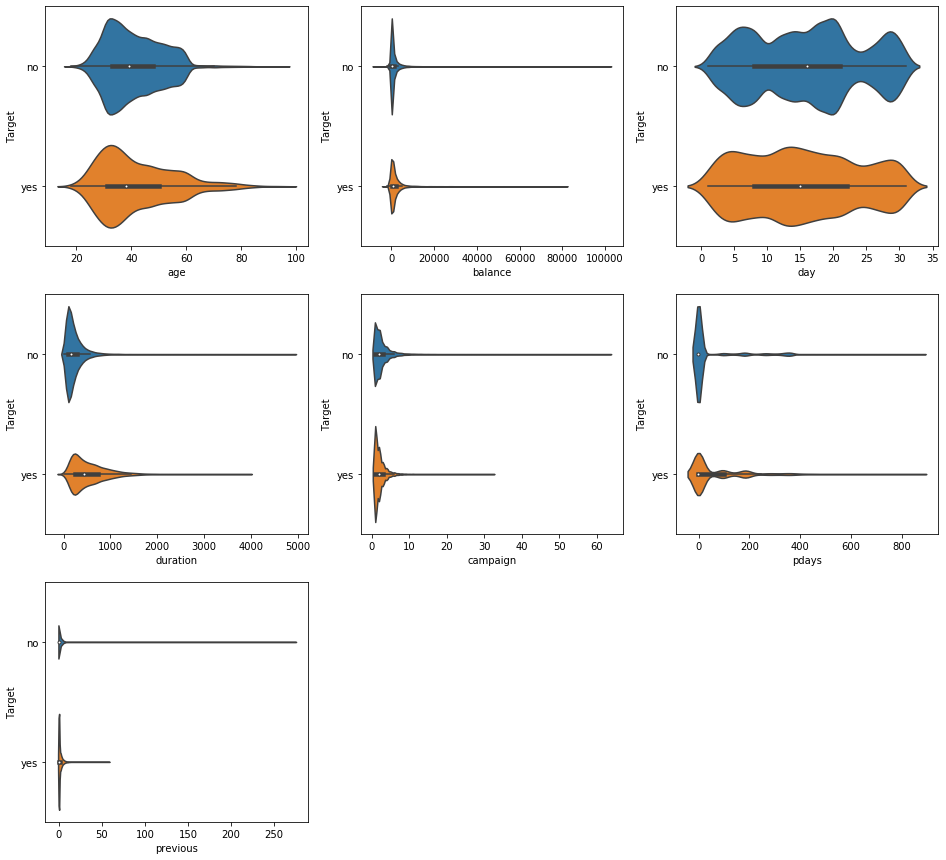

In [14]:
fig, ax = plt.subplots(nrows = 3,ncols=3,figsize=(16,15))
sns.violinplot(campaign_copy_df['age'], campaign_copy_df['Target'],ax = ax[0][0])
sns.violinplot(campaign_copy_df['balance'], campaign_copy_df['Target'],ax = ax[0][1])
sns.violinplot(campaign_copy_df['day'], campaign_copy_df['Target'],ax = ax[0][2])
sns.violinplot(campaign_copy_df['duration'], campaign_copy_df['Target'],ax = ax[1][0])
sns.violinplot(campaign_copy_df['campaign'], campaign_copy_df['Target'],ax = ax[1][1])
sns.violinplot(campaign_copy_df['pdays'], campaign_copy_df['Target'],ax = ax[1][2])
sns.violinplot(campaign_copy_df['previous'], campaign_copy_df['Target'],ax = ax[2][0])                                                                            
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

Inference from violin graph:

Strong predictors: "pdays", "duration" and "previous".    
However "duration" will not be included as part of predictive modelling.

Weak predictors: "Age" and "day"

In [15]:
#further analysis of outliers
#find zscore of the numerical attributes
cols = num_cols.columns
zscore_num = zscore(num_cols)
zscore_num_df = pd.DataFrame(zscore_num, columns = cols)

#check how many number of records are 3 std away from mean
((zscore_num_df < -3) | (zscore_num_df > 3)).sum()

age          381
balance      745
day            0
duration     963
campaign     840
pdays       1723
previous     582
dtype: int64

Inference: There are significant number of records which fall away from the 3 standard deviations.

Correlation analysis of continuous independent variables

In [17]:
campaign_copy_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


(7.5, -0.5)

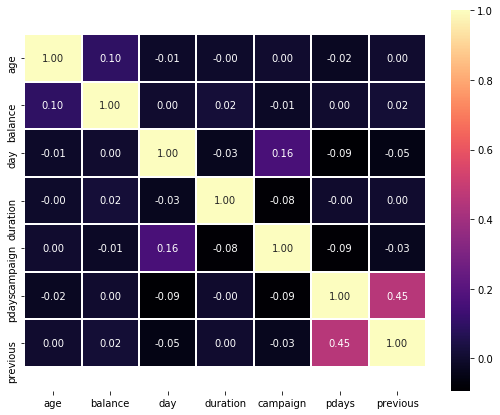

In [18]:
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.heatmap(campaign_copy_df.corr(), ax = ax,annot=True, linewidths=1,fmt='.2f',cmap='magma')
bottom , top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Inferences from pearson correlation and Pairplot for continuous variables: 
   
Weak correlations:    
(i) There exists a very loose correlation between age and balance.    
(ii) A similar trend could be noticed between campaign and day.

moderate correlations:    
(i) pdays and previous correlate to one another     moderately.

Strong correlations:    
There are no strong corrleations between the continuous    variables.

In [20]:
campaign_copy_df.corr(method = 'spearman')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096380,-0.008948,-0.033257,0.037136,-0.017468,-0.011900
balance,0.096380,1.000000,0.001329,0.042651,-0.030959,0.069676,0.079536
day,-0.008948,0.001329,1.000000,-0.058142,0.139581,-0.092226,-0.087780
duration,-0.033257,0.042651,-0.058142,1.000000,-0.107962,0.028698,0.031175
campaign,0.037136,-0.030959,0.139581,-0.107962,1.000000,-0.112284,-0.108448
pdays,-0.017468,0.069676,-0.092226,0.028698,-0.112284,1.000000,0.985645
previous,-0.011900,0.079536,-0.087780,0.031175,-0.108448,0.985645,1.000000


(7.5, -0.5)

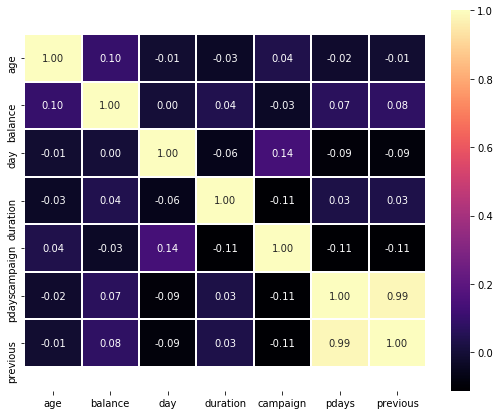

In [21]:
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.heatmap(campaign_copy_df.corr(method='spearman'), ax = ax,annot=True, linewidths=1,fmt='.2f',cmap='magma')
bottom , top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Inference from spearman correlation:       
A very strong relation can be noticed between pdays and previous. So the attribute 'previous' could be dropped. 

Correlation and Statistical analysis of continuous independent variables and the binomial target variable.

Apply one way anova or ttest to find the relation between continous attributes and the Target.

In [23]:
anova_result = pd.DataFrame([],columns=['Anova-pvalue', 'Fvalue'])

#applying anova test for continuous variable and target
for i in num_cols:
    model = ols(i+' ~ C(Target)', campaign_copy_df).fit()
    anova_result.loc[i,'Anova-pvalue'] = sm.stats.anova_lm(model,typ=1).iloc[0]['PR(>F)']
    anova_result.loc[i,'Fvalue'] = sm.stats.anova_lm(model,typ=1).iloc[0]['F']    
    
anova_result

,Anova-pvalue,Fvalue
age,8.82564e-08,28.6252
balance,2.52111e-29,126.572
day,1.65388e-09,36.359
duration,0,8333.76
campaign,1.01235e-54,243.358
pdays,3.79055e-108,490.697
previous,7.80183e-88,396.444


Inference:    

(1) The duration and Target are dependent.

Since the p value is zero which implies the variance between the means are very high when compare to the variance within the each group.

Therefore it can be concluded that the a clear boundary could be drawn on duration based on Target.

(2) pdays and Target are somewhat related as the p-value is significantly small.

(3) Age and Target are not dependent as the p value is not very small.

(4) day and Target are not dependent as the p value is not very small.

Spearman correlation for the continuous and discrete data

In [24]:
spearman_result = pd.DataFrame([],columns=['spearman-correlation', 'pvalue'])

#impute the binomial target with '0' and '1'
labelencoder = LabelEncoder()
Target = pd.DataFrame(labelencoder.fit_transform(campaign_copy_df['Target']))

#applying spearman test for continuous variable and target
for i in num_cols:    
    continuous_df = pd.DataFrame(campaign_copy_df[i])
    spearman_result.loc[i,'spearman-correlation'] = spearmanr(continuous_df.join(Target)).correlation
    spearman_result.loc[i,'pvalue'] = spearmanr(continuous_df.join(Target)).pvalue
    
spearman_result

,spearman-correlation,pvalue
age,-0.00874999,0.0628172
balance,0.100295,2.09556e-101
day,-0.0295484,3.29904e-10
duration,0.342469,0
campaign,-0.0840536,1.10937e-71
pdays,0.154055,3.9001e-238
previous,0.169124,2.85223e-287


Inference: 
Duration and Target has some good relation.

variable 'age' has week dependency with 'Target'. The attribute 'age' can be dropped.

Finding Relation between independent Discrete variables and independent continous variables

In [25]:
anova_result = pd.DataFrame([])
obj_cols = campaign_copy_df.select_dtypes(include = ['object'])

#applying anova test for continuous variable and discrete variables
for i in num_cols:
    for j in obj_cols:        
        model = ols(i+' ~ C('+j+')', campaign_copy_df).fit()
        anova_result.loc[i,j] = sm.stats.anova_lm(model,typ=1).iloc[0]['PR(>F)']
        
anova_result

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
age,0.000000e+00,0.000000e+00,0.000000e+00,1.436177e-04,0.000000e+00,8.719799e-04,1.597830e-290,3.059617e-245,4.840702e-17,8.825644e-08
balance,5.709430e-94,1.605587e-08,2.849538e-75,8.246278e-46,1.582632e-48,3.544641e-72,1.244231e-24,2.002290e-231,3.088104e-15,2.521114e-29
day,5.489892e-17,2.597196e-01,1.089429e-06,4.509349e-02,2.669905e-09,1.562178e-02,2.050227e-15,0.000000e+00,2.009226e-73,1.653880e-09
duration,1.232447e-11,5.697950e-06,8.837767e-01,3.310185e-02,2.805147e-01,8.310901e-03,2.239459e-09,1.079679e-38,4.250760e-20,0.000000e+00
campaign,6.253473e-24,2.013545e-10,1.824042e-04,3.476985e-04,5.212410e-07,3.383802e-02,3.199084e-31,0.000000e+00,2.888451e-124,1.012347e-54
pdays,1.107741e-27,2.817855e-09,8.522341e-06,1.820913e-10,8.305619e-155,1.307759e-06,0.000000e+00,0.000000e+00,0.000000e+00,3.790553e-108
previous,3.183471e-13,1.431440e-03,8.192732e-07,9.715925e-05,3.121519e-15,1.886590e-02,6.567538e-237,3.718515e-296,0.000000e+00,7.801830e-88


Inference:       
1) Job and age have good dependency    
2) Marital and age are interlinked       
3) Education and age are tightly coupled       
4) Housing and age are having good dependencies          
5) contact and pdays have strong relationship       
6) month is having good dependency with pdays, duration and day  

Discrete Data Analysis

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')


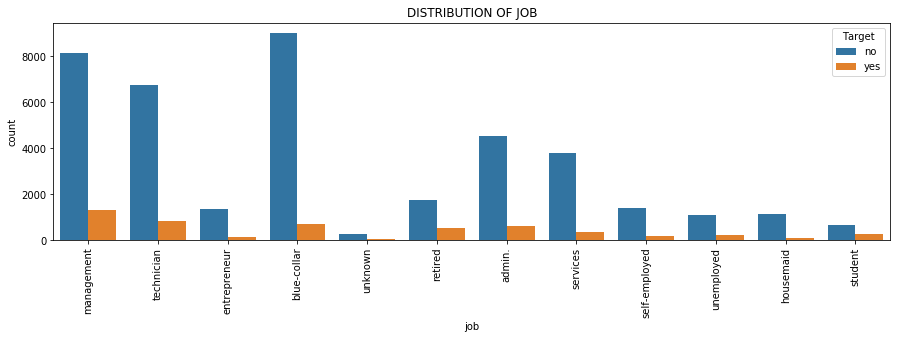

In [26]:
obj_cols = campaign_copy_df.select_dtypes(include = ['object'])

print(obj_cols.columns)
plt.figure(figsize=(15,4))
plt.subplot(1, 1, 1)
plt.xticks(rotation=90)
plt.title('DISTRIBUTION OF JOB')
sns.countplot(campaign_copy_df['job'], hue=campaign_copy_df['Target'])

Inference for job:    
1) Most of the customers belong to the job category of management, technician, blue-collar.    
2) A very few are in student and unknown subclassification.

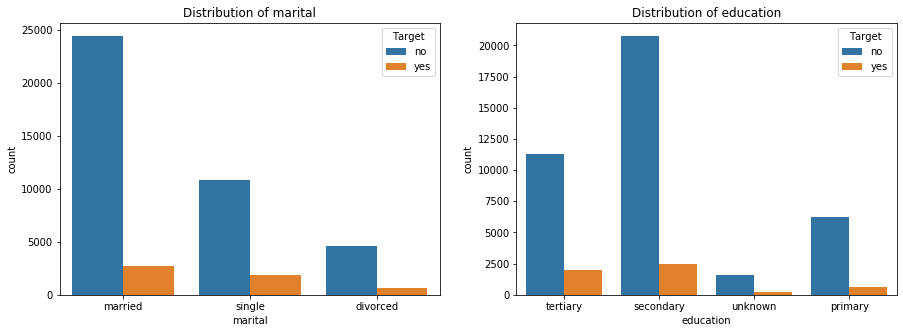

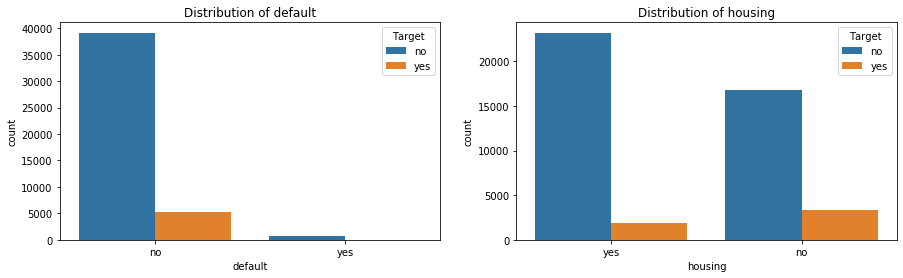

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of marital')
sns.countplot(campaign_copy_df['marital'], hue=campaign_copy_df['Target'])

plt.subplot(1, 2, 2)
plt.title('Distribution of education')
sns.countplot(campaign_copy_df['education'], hue=campaign_copy_df['Target'])

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title('Distribution of default')
sns.countplot(campaign_copy_df['default'], hue=campaign_copy_df['Target'])

plt.subplot(1, 2, 2)
plt.title('Distribution of housing')
sns.countplot(campaign_copy_df['housing'], hue=campaign_copy_df['Target'])

marital status : maximum customers are married and a very few divorced.

education status: most of the people have completed secondary education.

default status: a few customers have defaulted the loan. 
most of them have no default.

housing: number of people who have taken housing loan is higher when compare to those who don't.

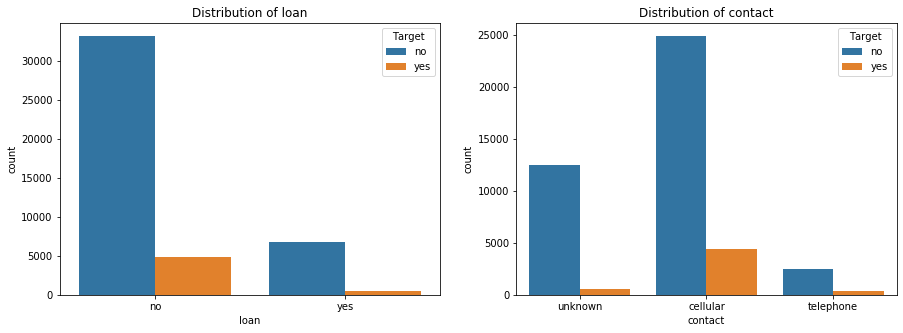

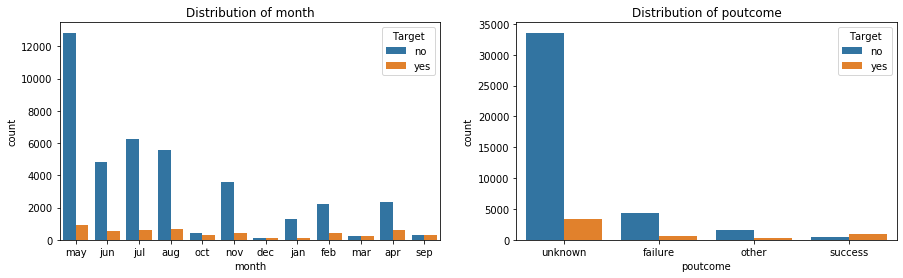

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of loan')
sns.countplot(campaign_copy_df['loan'],hue=campaign_copy_df['Target'])

plt.subplot(1, 2, 2)
plt.title('Distribution of contact')
sns.countplot(campaign_copy_df['contact'], hue=campaign_copy_df['Target'])

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title('Distribution of month')
sns.countplot(campaign_copy_df['month'], hue=campaign_copy_df['Target'])

plt.subplot(1, 2, 2)
plt.title('Distribution of poutcome')
sns.countplot(campaign_copy_df['poutcome'], hue=campaign_copy_df['Target'])

personal loan: most of the customers do not take personal loan.

contact: most of the people have communication type as 'cellular contact'.

month: 'may' month is when the customers were contacted more frequently. conversely, a very less number of calls have been made on the months 'mar', 'sep', 'oct', 'dec'.

poutcome: most of the previous outcome is unknown.

Chisquare test to understand the relationship between target and nominal independent variables.

In [29]:
chisquare_df = pd.DataFrame([], columns=obj_cols.columns, index = obj_cols.columns)
#calculate the pvalue from chisquare stats
for i in obj_cols:            
    for j in obj_cols:            
        cont = pd.crosstab(campaign_copy_df[i], campaign_copy_df[j])            
        chisquare_df.loc[i,j] = chi2_contingency(cont)[1]        

chisquare_df

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
job,0,0,0,8.00804e-09,0,5.93733e-103,0,0,6.1114e-97,3.33712e-172
marital,0,0,8.20775e-286,0.000234116,6.29978e-05,3.2987e-27,1.11455e-38,3.24889e-86,1.90312e-14,2.1451e-43
education,0,8.20775e-286,0,0.00963816,3.07848e-139,7.33079e-63,1.99969e-291,0,1.95544e-32,1.62666e-51
default,8.00804e-09,0.000234116,0.00963816,0,0.212925,2.93096e-60,1.42014e-06,1.0422e-27,6.53992e-16,2.45386e-06
housing,0,6.29978e-05,3.07848e-139,0.212925,0,1.73153e-18,0,0,1.64233e-200,2.9188e-192
loan,5.93733e-103,3.2987e-27,7.33079e-63,2.93096e-60,1.73153e-18,0,0.00251184,0,1.02052e-29,1.66506e-47
contact,0,1.11455e-38,1.99969e-291,1.42014e-06,0,0.00251184,0,0,0,1.25174e-225
month,0,3.24889e-86,0,1.0422e-27,0,0,0,0,0,0
poutcome,6.1114e-97,1.90312e-14,1.95544e-32,6.53992e-16,1.64233e-200,1.02052e-29,0,0,0,0
Target,3.33712e-172,2.1451e-43,1.62666e-51,2.45386e-06,2.9188e-192,1.66506e-47,1.25174e-225,0,0,0


Inference of categorical correlation analysis:     
Strong predictors:     
"Job", "housing", "contact" , "month", "poutcome"

very moderate predictors:     
"marital", "education", "loan"

weak predictor:    
"default"

Continuous variables to be excluded:   
age - weak predictor   
day - weak predictor    
previous - since 'pdays' and 'previous' have strong correlation   
duration - should not be included for predictive model   

Discrete variables to be excluded:   
Target - output to be predicted     
default - weak predictor    
marital, education - not strong predictors. The same info can be represented by job     
loan - It has good dependency with month and job

Total Target yes Values    : 5289 (11.70%)
Total Target no  Values    : 39922 (88.30%)



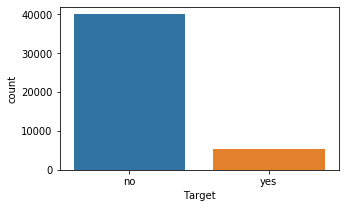

In [30]:
#display the proportions of the target variable to check the distribution
plt.figure(figsize=(5,3))
sns.countplot(campaign_copy_df['Target'])
Target_count = campaign_copy_df['Target'].value_counts()

print("Total Target yes Values    : {0} ({1:0.2f}%)".format(len(campaign_copy_df.loc[campaign_copy_df['Target'] == 'yes']), (len(campaign_copy_df.loc[campaign_copy_df['Target'] == 'yes'])/len(campaign_copy_df.index)) * 100))
print("Total Target no  Values    : {0} ({1:0.2f}%)".format(len(campaign_copy_df.loc[campaign_copy_df['Target'] == 'no']), (len(campaign_copy_df.loc[campaign_copy_df['Target'] == 'no'])/len(campaign_copy_df.index)) * 100))
print("")

Target data proportions

The proportion of Target 'no' is very high when compare to Target 'yes'.

In [31]:
#preparing the data for models
#dropping the irrelevant columns
X = campaign_copy_df.drop(['age','day','balance','previous','duration','Target','default','loan','marital','education'],axis=1)
y = campaign_copy_df['Target'].replace({'no':0,'yes':1})


obj_cols = X.select_dtypes(include = ['object']).columns.values
num_cols = X.select_dtypes(include = ['int64']).columns.values

#use min_max_scaler to scale the numeric data
minmaxscaler = MinMaxScaler()
x = minmaxscaler.fit_transform(X[num_cols])

final_x = pd.DataFrame(x,columns=num_cols).join(X[obj_cols])

In [32]:
#print the shape of the final file
print("Shape of the final input:",final_x.shape)

#print the finalised independent features
print("\nfinalised independent features:\n",final_x.columns.values)

Shape of the final input: (45211, 7)

finalised independent features:
 ['campaign' 'pdays' 'job' 'housing' 'contact' 'month' 'poutcome']


Splitting the data into 70% train and 30% test

In [33]:
train_x,test_x,train_y,test_y = train_test_split(final_x,y,test_size=0.3,random_state=10)

In [34]:
print("Original subscribed True Values    : {0} ({1:0.2f}%)".format(len(campaign_copy_df.loc[campaign_copy_df['Target'] == 'yes']), (len(campaign_copy_df.loc[campaign_copy_df['Target'] == 'yes'])/len(campaign_copy_df.index)) * 100))
print("Original subscribed False Values   : {0} ({1:0.2f}%)".format(len(campaign_copy_df.loc[campaign_copy_df['Target'] == 'no']), (len(campaign_copy_df.loc[campaign_copy_df['Target'] == 'no'])/len(campaign_copy_df.index)) * 100))
print("")
print("Training subscribed True Values    : {0} ({1:0.2f}%)".format(len(train_y[train_y[:] == 1]), (len(train_y[train_y[:] == 1])/len(train_y)) * 100))
print("Training subscribed False Values   : {0} ({1:0.2f}%)".format(len(train_y[train_y[:] == 0]), (len(train_y[train_y[:] == 0])/len(train_y)) * 100))
print("")
print("Test subscribed True Values        : {0} ({1:0.2f}%)".format(len(test_y[test_y[:] == 1]), (len(test_y[test_y[:] == 1])/len(test_y)) * 100))
print("Test subscribed False Values       : {0} ({1:0.2f}%)".format(len(test_y[test_y[:] == 0]), (len(test_y[test_y[:] == 0])/len(test_y)) * 100))
print("")

Original subscribed True Values    : 5289 (11.70%)
Original subscribed False Values   : 39922 (88.30%)

Training subscribed True Values    : 3731 (11.79%)
Training subscribed False Values   : 27916 (88.21%)

Test subscribed True Values        : 1558 (11.49%)
Test subscribed False Values       : 12006 (88.51%)



In [35]:
#we should have the train and test inputs in two formats

#format1 : To provide input to logistic regression and svm dropping one column
train_x1 = pd.get_dummies(train_x,drop_first=True)
test_x1 = pd.get_dummies(test_x,drop_first=True)

#format2 : keeping train_x and test_x same for catboost

#print the shape of all the input datas
print("Format1 training input:", train_x1.shape)
print("Format1 testing input:", test_x1.shape)
print("Format2 training input:", train_x.shape)
print("Format2 testing input:", test_x.shape)

Format1 training input: (31647, 30)
Format1 testing input: (13564, 30)
Format2 training input: (31647, 7)
Format2 testing input: (13564, 7)


In [36]:
#use variance influence factor to eliminate redundant features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = train_x1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,poutcome_unknown,14.09
23,month_may,5.73
15,contact_unknown,3.31
21,month_jun,3.22
13,housing_yes,3.06
20,month_jul,3.03
1,pdays,2.99
16,month_aug,2.95
2,job_blue-collar,2.70
5,job_management,2.63


In [37]:
#dataframe to store the results of all the algorithms
col_names = ['train_score', 'test_score', 'precision',
             'recall', 'F1_score']
complete_result = pd.DataFrame([], columns = col_names)

The confusion matrix of decisiontre_depth3:
 [[  289  1269]
 [  162 11844]]


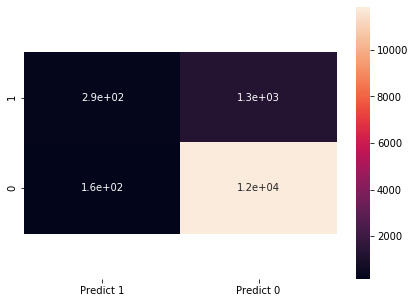

In [38]:
decisiontreeclassifier = DecisionTreeClassifier(random_state=10,criterion='entropy',max_depth =3, min_samples_leaf=5)
decisiontreeclassifier.fit(train_x1, train_y)
complete_result.loc['decisiontre_depth3', 'train_score'] = decisiontreeclassifier.score(train_x1, train_y)
complete_result.loc['decisiontre_depth3', 'test_score'] = decisiontreeclassifier.score(test_x1, test_y)
predict_y = decisiontreeclassifier.predict(test_x1)
complete_result.loc['decisiontre_depth3', 'precision'] = precision_score(test_y, predict_y)
complete_result.loc['decisiontre_depth3', 'recall'] = recall_score(test_y, predict_y)
complete_result.loc['decisiontre_depth3', 'F1_score'] = f1_score(test_y, predict_y)


#print confusion matrix
cm = metrics.confusion_matrix(test_y,predict_y, labels = [1,0])
df = pd.DataFrame(cm , index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df,annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("The confusion matrix of decisiontre_depth3:\n", cm)

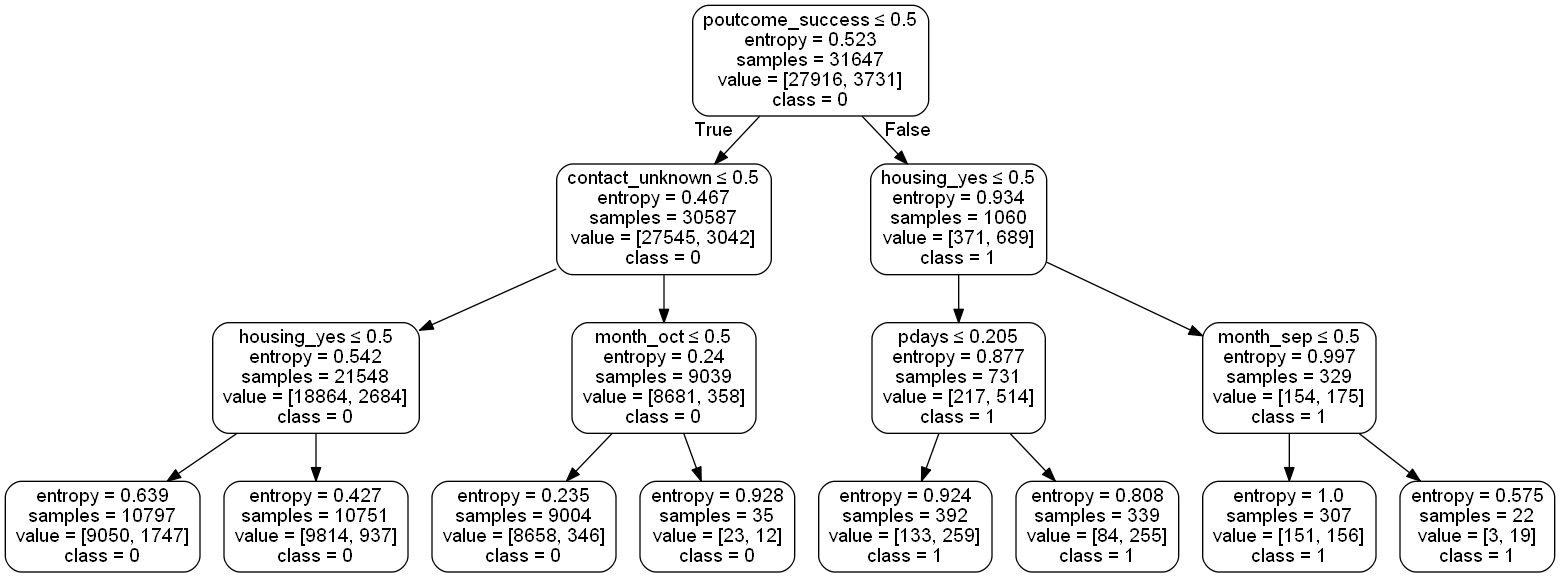

In [39]:
dot_data = StringIO()
export_graphviz(decisiontreeclassifier, out_file = dot_data, 
                feature_names = train_x1.columns, class_names = ['0', '1'],
                rounded = True, special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('test.png')
Image(graph.create_png())

In [53]:
feature_importance = pd.DataFrame(train_x1.columns, columns=['feature_name'])
feature_importance['feature_value'] = decisiontreeclassifier.feature_importances_
feature_importance.sort_values(by='feature_value', ascending = False)

,feature_name,feature_value
28,poutcome_success,0.508989
15,contact_unknown,0.172225
13,housing_yes,0.089095
20,month_jul,0.062862
16,month_aug,0.049528
0,campaign,0.025147
1,pdays,0.023003
22,month_mar,0.018687
21,month_jun,0.017649
25,month_oct,0.009963


The confusion matrix of decisiontre_depth5:
 [[  222  1336]
 [   88 11918]]


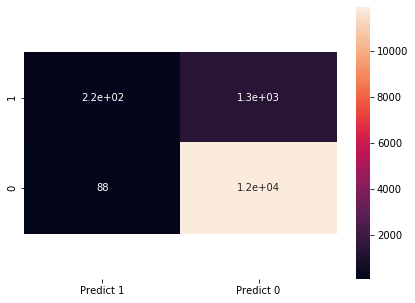

In [54]:
decisiontreeclassifier = DecisionTreeClassifier(random_state=10,criterion='entropy',max_depth =5, min_samples_leaf=5)
decisiontreeclassifier.fit(train_x1, train_y)
complete_result.loc['decisiontre_depth5', 'train_score'] = decisiontreeclassifier.score(train_x1, train_y)
complete_result.loc['decisiontre_depth5', 'test_score'] = decisiontreeclassifier.score(test_x1, test_y)
predict_y = decisiontreeclassifier.predict(test_x1)
complete_result.loc['decisiontre_depth5', 'precision'] = precision_score(test_y, predict_y)
complete_result.loc['decisiontre_depth5', 'recall'] = recall_score(test_y, predict_y)
complete_result.loc['decisiontre_depth5', 'F1_score'] = f1_score(test_y, predict_y)


#print confusion matrix
cm = metrics.confusion_matrix(test_y,predict_y, labels = [1,0])
df = pd.DataFrame(cm , index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df,annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("The confusion matrix of decisiontre_depth5:\n", cm)